<a href="https://colab.research.google.com/github/federicocampo/CNN_prova/blob/Prime_modifiche/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dataset from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import time
import logging

logger = logging.getLogger('Mylogger')
logger.setLevel(logging.DEBUG)

ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(name)s (%(levelname)s): %(message)s')
ch.setFormatter(formatter)

logger.addHandler(ch)

# Reading and visualize the images

In [7]:
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
import os
import glob
import numpy as np

In [8]:
PATH = 'gdrive/MyDrive/IMAGES/Mammography_micro'

*Imread* returns a 60 x 60 array

In [15]:
import multiprocessing as mp

def read_img(image_path):
  '''Returns the numpy.array of images and label found in image_path'''

  #Creating a list of all image names found in image_path
  fnames = glob.glob(os.path.join(image_path, '*.pgm'))

  #Defining 4 sub-processes and apply imread to all the images found previously
  pool = mp.Pool(processes=4)
  results = pool.map_async(imread, fnames)

  #Get the list of images and convert to numpy array
  x = results.get()
  x_np = np.array(x, dtype='float32')[..., np.newaxis]/255

  logger.info('Num images found in %s: %d',image_path, len(x_np))

  #Create a list of corrisponding labels and conver it to numpy array
  label = os.path.basename(image_path)
  y = [int(label)] * len(x_np)
  y_np = np.array(y)

  
  return x_np, y_np


In [16]:
start_time = time.time()

#Define the path to the sub-folder of Train images folder containing "normal" breast mammograms
image_path = os.path.join(PATH, 'Train/0')
#Create the test images and labels array with read_img function
x0_train, y0_train = read_img(image_path)


#Define the path to the sub-folder of Train images folder containing breast mammograms with microcalcifications
image_path = os.path.join(PATH, 'Train/1')
#Create the test images and labels array with read_img function
x1_train, y1_train = read_img(image_path)

#Create an array with both normal and sick images and labels
x_train = np.concatenate((x0_train, x1_train), axis = 0)
y_train = np.concatenate((y0_train, y1_train))

#Doing the same of previous lines, on Test folder
image_path = os.path.join(PATH, 'Test/0')
x0_test, y0_test = read_img(image_path)

image_path = os.path.join(PATH, 'Test/1')
x1_test, y1_test = read_img(image_path)

x_test = np.concatenate((x0_test, x1_test), axis = 0)
y_test = np.concatenate((y0_test, y1_test))

#Print the total number of images found.
print(f'There are {len(x_train)} train images and {len(x_test)} test images')

elapsed_time = time.time() - start_time
logger.debug('Done in %.2f s', elapsed_time)


Mylogger (INFO): Num images found in gdrive/MyDrive/IMAGES/Mammography_micro/Train/0: 209


<class 'list'>


Mylogger (INFO): Num images found in gdrive/MyDrive/IMAGES/Mammography_micro/Train/1: 187


<class 'list'>


Mylogger (INFO): Num images found in gdrive/MyDrive/IMAGES/Mammography_micro/Test/0: 205


<class 'list'>


Mylogger (INFO): Num images found in gdrive/MyDrive/IMAGES/Mammography_micro/Test/1: 196
Mylogger (DEBUG): Done in 1.54 s


<class 'list'>
There are 396 train images and 401 test images


***Visualize some images***

Visualize n random train images and n random test images 

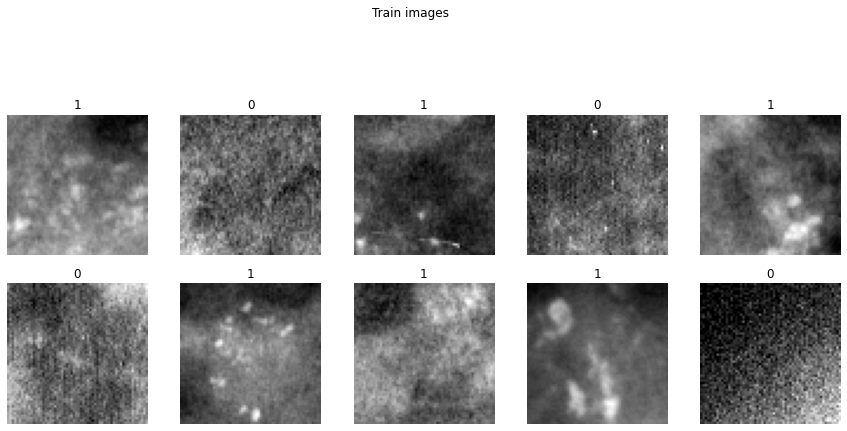

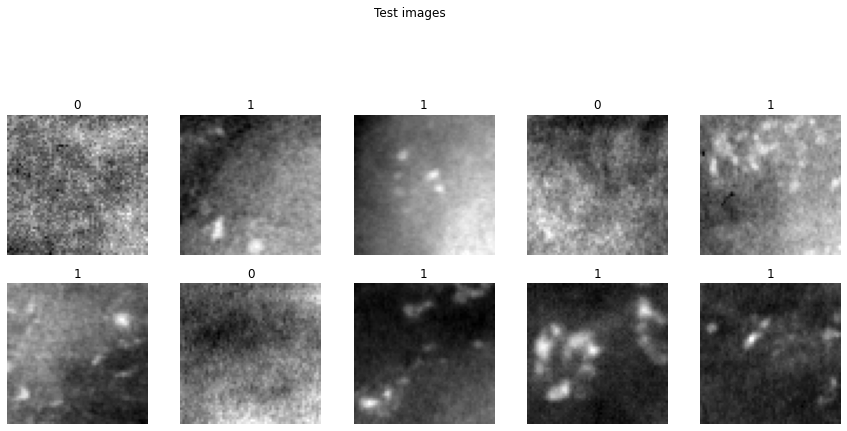

In [33]:
import random 

#defining the number of images to visualize
n = 10


#Defining the number or rows and columns of the subplots based on the parity of n
if n % 2 == 0:
  n_rows = n/2
  n_cols = n/2
else: 
  n_rows = int(round(n/2))
  n_cols = int(round(n/2)) +1

#Create the main figure and the subfigures of training images
plt.figure(1, figsize = (15, 15))
plt.suptitle('Train images')
for i in range(1, n+1):
  #Choose a random index among x_train number of images
  r = random.randrange(0, len(x_train))
  Im = x_train[r].squeeze()
  plt.subplot(n_rows, n_cols, i)
  plt.imshow(Im, cmap = 'gray')
  plt.axis('off')
  plt.title(f'{y_train[r]}')

#Create the main figure and the subfigures of test images
plt.figure(2, figsize = (15, 15))
plt.suptitle('Test images')
for i in range(1, n+1):
  r = random.randrange(0, len(x_test))
  Im = x_test[r].squeeze()
  plt.subplot(n_rows, n_cols, i)
  plt.imshow(Im, cmap = 'gray')
  plt.axis('off')
  plt.title(f'{y_test[r]}')


#Data augmentation

Convert all 'pgm' images format to 'png' format

In [ ]:
import PIL
import os

In [ ]:
def convert_to_png(fname, dest_folder):
  '''Convert a single pgm image to png format'''
  #Create a new folder to put converted images in
  if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)
  
  #Change the name of the filename to png extension
  conv_fname = os.path.basename(fname).replace('.pgm', '.png')
  #Define the destination file path
  conv_filepath = os.path.join(dest_folder, new_fname)
  #Convert the image to grayscale and save it
  PIL.Image.open(fname).convert('L').save(dest_fname)

In [ ]:
for data_path in [os.path.join(PATH, "Train"), os.path.join(PATH, "Test")]:
  for path, folders, fnames in os.walk(data_path):
    #Using convert_to_png function to every filename
    for fname in fnames:
      abs_path = os.path.join(path, fname)
      #Create folders for png images at the same path of original pgm images
      dest_folder = path.replace('Train', 'Train_png').replace('Test', 'Test_png')
      convert_to_png(abs_path, dest_folder)


#Data aumentation. 

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Il FLOW_FROM_DIRECTORY takes as input the destination folder path and generates batches of images giving as output an iterator (x, y) where y is the iterator over the labels and x over the images.

Images shape = (batch_size, *target_size, channels) where:

*  batch_size (default = 32) number of images generated from every single x_train image.

Default format of images = png



*  subset = training o validation, funziona solo se c'è validation_split nel 




ImageDataGenerator


IMAGEDATAGENERATOR:
Validation_split = 0.3 divide tutte le N immagini di x_train in: 70% train e 30% validazione e usa questo dataset nel model.fit 


Il.next() accede ad una immagine. train_gen.next()[0] ha shape = (32, 60, 60, 1) cioè per ogni immagine del dataset, lui genera 32 immagini modificate di dimensione 60x60 di colori grayscale

In [ ]:
path_to_png_data = os.path.join(PATH, "Train_png")

img_width, img_height = (60, 60)

aug_validation_split = 0.3


train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,  #Rescale every pixel to have a value between 0 and 1
        shear_range=0.2, #Stretches the image 
        zoom_range=0.2, 
        horizontal_flip=True,
        fill_mode='reflect',
        validation_split = aug_validation_split)  
        



train_gen = train_datagen.flow_from_directory(
    path_to_png_data,
    target_size=(img_width, img_height),
    color_mode='grayscale', 
    class_mode='binary',
    subset='training')

val_gen = train_datagen.flow_from_directory(
    path_to_png_data,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    class_mode='binary',
    subset='validation')



Found 278 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


# Defining a CNN model

In [38]:
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, InputLayer, Activation, Dropout
from keras.models import Sequential

In [39]:
def make_model(shape=(60, 60, 1)):
  ''' Returns the CNN model'''
  model = Sequential([
      
      Conv2D(50, (5,5), padding='same', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
      
      Conv2D(60, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
        
      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(50, (4,4), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D(2, 2),

      Flatten(), 
      

      Dense(1, activation='sigmoid')
      
  ])
  
  return model


#Fit model on original dataset

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "model-{epoch:02d}-{val_accuracy:.2f}.hdf5", 
    monitor='val_accuracy', 
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto', save_freq='epoch')


In [ ]:
from keras.optimizers import SGD

model = make_model()

model.compile(optimizer=SGD(lr = 0.001, momentum = 0.5), metrics = 'accuracy', loss='binary_crossentropy')

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_split=0.3, 
                    epochs=100, 
                    batch_size=30, 
                    shuffle=True, 
                    callbacks = [checkpoint],
                    verbose=1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save(os.path.join(PATH, 'model.hdf5'))
model.evaluate(x_test, y_test)  # returns 'loss' and 'metrics' (accuracy)

# Fit model on augmented dataset

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "model_augmented.{epoch:02d}-{val_accuracy:.2f}.h5", 
    monitor='val_accuracy', 
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto', save_freq='epoch')


In [ ]:
Tot_train_imgs = len(x_train)

In [ ]:
from keras.optimizers import SGD


model = make_model()


model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])


batch_size=32
#Defining the number of images to use in each epoch
steps_per_epoch = int(Tot_train_imgs * (1- aug_validation_split))
validation_steps = int(Tot_train_imgs * aug_validation_split)

logger.info('Steps per epoch = %d', steps_per_epoch)
logger.info('Val steps = %d', validation_steps)


history = model.fit(
        train_gen,
        steps_per_epoch = steps_per_epoch // batch_size,
        epochs=100,
        validation_data=val_gen,
        validation_steps= validation_steps // batch_size,
        verbose=1,
        callbacks=[checkpoint])




Visualize the progress of training

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

Saving the model

In [ ]:
model.save(os.path.join(PATH, 'model_augmented.hdf5'))

model.evaluate(x_test, y_test)

# Comparing the performances of the two trainings

In [ ]:
from keras.models import load_model
aug_model = load_model(os.path.join(PATH, 'model_augmented.hdf5'))
noaug_model = load_model(os.path.join(PATH, 'model.hdf5'))

In [ ]:
noaug_model.evaluate(x_test, y_test)

aug_model.evaluate(x_test, y_test)

#Implement a cross-validation test

In [40]:
from sklearn.model_selection import KFold
from keras.optimizers import SGD

In [43]:
# Define per-fold score arrays
acc_per_fold = []
loss_per_fold = []

# Merge train and test in a single array
X_tot = np.concatenate((x_train, x_test), axis=0)
Y_tot = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

kfold = KFold(n_splits = num_folds, shuffle=True)

batch_size = 32
num_epochs = 30

fold_num = 1
for train, test in kfold.split(X_tot, Y_tot):
  #Redefine and compile the model to every cycle
  model = make_model()
  model.compile(optimizer=SGD(lr = 0.001, momentum = 0.9), metrics = 'accuracy', loss='binary_crossentropy')
  
  #Fitting the model using every folder but one as training
  history = model.fit(
          X_tot[train], Y_tot[train],
          batch_size = batch_size,
          verbose=0,
          epochs = num_epochs)  
  
  #Evaluate the efficiency of the model
  scores = model.evaluate(X_tot[test], Y_tot[test], verbose=0)

  print('In folder {:d}: {} of {:.4f} - {} of {:.4f}'.format(fold_num,
                                                          model.metrics_names[0],scores[0],
                                                          model.metrics_names[1], scores[1] ))

  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  fold_num += 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Computing average scores

In [42]:
print('Average scores for all folds:')
print(f'-- Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'-- Loss: {np.mean(loss_per_fold)}')

Average scores for all folds:
-- Accuracy: 0.8621044278144836 (+- 0.032789862312206194)
-- Loss: 0.29718898236751556
